## Exercise 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
import math
from numpy import random 
import seaborn as sns
import matplotlib.mlab as mlab 
import scipy.stats

In [3]:
df = pd.read_csv('bigcity.csv', index_col = 0)

In [4]:
df.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


Using the fact that both nominator and denominator converge in probability to the mathematical expectation of X and U  accordingly (WLLN) and division of plims is the plim of division, we can usi following estimator:

In [8]:
theta = df['x'].mean()/df['u'].mean()

In [9]:
theta

1.2390185991294025

### Bootstrap

In [5]:
Iterations = 100000
bs_replicates = np.empty(Iterations)
for i in range(Iterations):
    inds1 = np.random.choice(df.index.values, df.shape[0], replace  = True)
    inds2 = np.random.choice(df.index.values, df.shape[0], replace  = True)
    bs_replicates[i] = df.loc[inds1]['x'].mean()/df.loc[inds2]['u'].mean()

In [6]:
theta_std = np.std(bs_replicates)
theta_std

0.25282872449749466

In [10]:
theta_bias = np.mean(bs_replicates) - theta
theta_bias

0.025979149814232994

In [11]:
#confidence intervals
conf_int = np.percentile(bs_replicates, [5, 95])
conf_int

array([0.89686466, 1.72099461])

## Exercise 2

In [10]:
its = 10000
uniform_data = stats.uniform.rvs(size=its, loc = 0, scale=1)

In [11]:
def inverse_F(F, mu = 1, alpha = 1): #we use these default params
    return (mu*(-np.log(1-F))**(1/alpha))

In [12]:
F_draw = list(map(inverse_F, uniform_data))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Drawn distribution')

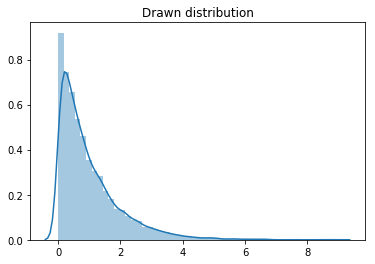

In [13]:
sns.distplot(F_draw).set_title('Drawn distribution')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Weibull distribution')

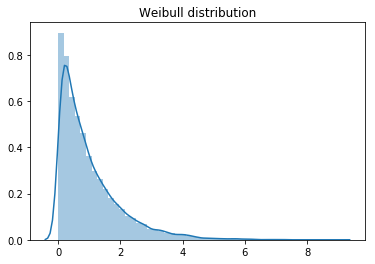

In [14]:
sns.distplot(np.random.weibull(a = 1, size = 10000)).set_title('Weibull distribution')

## Exercise 3

In [29]:
# Generate data 
N = 10000
a = 0.3

sample1 = random.normal(0, 0.1, size = int(N*a))
sample2 = random.normal(3, 0.1, size = int(N*(1-a)))

sample = np.concatenate([sample1, sample2])

In [30]:
def gaussian(x, mean, dev = 0.1):
    # standard deviation, square root of variance
    return 1 / np.sqrt(2 * np.pi) / dev * np.exp( -(x - mean) ** 2 / 2 / (dev ** 2) )

In [31]:
max_iter = 100

# initial values 
params = np.array([-1, 1, 1, 2, 0.5])

counter = 0 
converged = False 
tol = 10**(-14)

plabel1 = np.zeros(sample.shape)
plabel2 = np.zeros(sample.shape)


[0.00952944 2.5403111  0.22672009 1.08288598 0.17403609]
[-7.53760773e-04  2.91620607e+00  9.96308343e-02  5.00766258e-01
  2.79860667e-01]
[8.79744610e-04 2.99942703e+00 1.00656775e-01 9.98538978e-02
 2.99999698e-01]
[8.80064051e-04 2.99942818e+00 1.00657256e-01 9.98383675e-02
 3.00000000e-01]
[8.80064051e-04 2.99942818e+00 1.00657256e-01 9.98383675e-02
 3.00000000e-01]


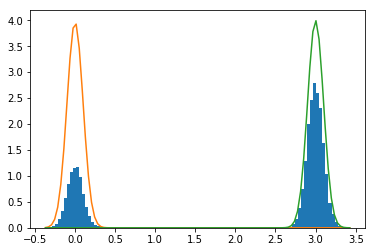

In [32]:
while not converged and counter < max_iter:
    counter += 1    
    mu1, mu2, sig1, sig2, pi_1 = params
    
    # Expectation step 
    for i in range(len(sample)):
        cdf1 = gaussian(sample[i], mu1, sig1)
        cdf2 = gaussian(sample[i], mu2, sig2)
        
        pi_2 = 1 - pi_1
        
        plabel1[i] = cdf1 * pi_1 / (cdf1 * pi_1 + cdf2 * pi_2)
        plabel2[i] = cdf2 * pi_2 / (cdf1 * pi_1 + cdf2 * pi_2)        
    # Maximization step

    mu1 = sum(sample * plabel1)/sum(plabel1)
    mu2 = sum(sample * plabel2)/sum(plabel2)
    sig1 = np.sqrt(sum(plabel1*(sample-mu1)**2)/sum(plabel1))
    sig2 = np.sqrt(sum(plabel2*(sample-mu2)**2)/sum(plabel2))
    pi_1 = sum(plabel1)/len(sample)
    
    new_parameters = np.array([mu1, mu2, sig1, sig2, pi_1])
    print(new_parameters)
    
    # Checking the convergence 
    if np.max(abs(np.asarray(params) - np.asarray(new_parameters))) < tol:
        converged = True
    
    params = new_parameters
    

plt.hist(sample, bins = 100, density = True)
x = np.linspace(sample.min(), sample.max(), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu1, sig1))
plt.plot(x, scipy.stats.norm.pdf(x, mu2, sig2))


plt.show()

## Exercise 4

#### 1)

In [36]:
def p(x, d):
    if x > 0:
        y = d/(x*math.sqrt(2*math.pi)) * math.cosh(d*math.log(2*x)) * math.exp(-math.sinh(d*math.log(2*x))**2/2)
    else:
        y = 0
    return y

In [37]:
x = np.linspace(-0.5,2,1000)
d = 1.5

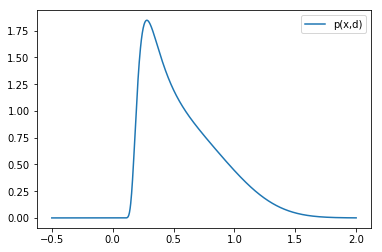

In [38]:
plt.plot(x, list(map(p, x, np.full(x.shape,d))), label = 'p(x,d)')
plt.legend()
plt.show()

#### 2)

In [39]:
def q(x):
    return stats.expon.pdf(x)

In [40]:
alpha = max(list(map(p, x[x>0], np.full(x[x>0].shape, d)))/q(x[x>0]))

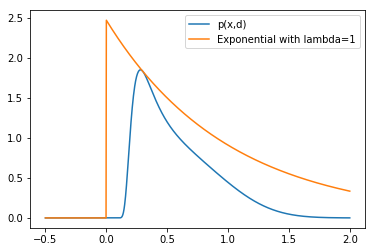

In [41]:
plt.plot(x, list(map(p, x, np.full(x.shape,d))), label = 'p(x,d)')
plt.plot(x, alpha*q(x), label = 'Exponential with lambda=1')
plt.legend()
plt.show()

In [42]:
def rejection_sampling(it):
    samples = []

    for i in range(it):
        z = np.random.exponential()
        u = np.random.uniform()

        if u <= p(z, d = d)/(alpha*q(z)):
            samples.append(z)

    return np.array(samples)

In [43]:
sample = np.array(rejection_sampling(it = 100000))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Draw from dist')

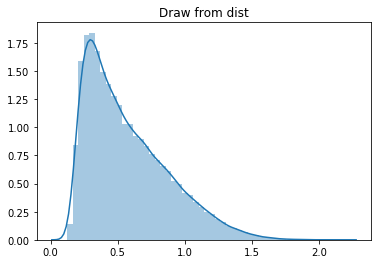

In [44]:
sns.distplot(sample).set_title('Draw from dist')

#### 3)

In [45]:
estimate = (sample**2).mean()
estimate

0.4190567142990418

In [46]:
its = 10000
bs_replicates = np.empty(its)
for i in range(its):
    inds = np.random.choice(np.arange(len(sample)), len(sample))
    bs_replicates[i] = (sample[inds]**2).mean()

In [47]:
#lets see what is the bias and std of our estimation
bias = estimate - np.mean(bs_replicates)
std = np.std(bs_replicates)
print(f'Bias = {bias:.5f}, standard deviation = {std:.5f}')

Bias = 0.00003, standard deviation = 0.00220
